# 6 - Geospatial analysis pipeline

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pvdeg
import csv
import h5py

In [2]:
import dask
import dask.array as da
import dask.dataframe as dd
import xarray as xr

# Single location example

In [3]:
# Get weather data
weather_db = 'NSRDB'
weather_id = (39.741931, -105.169891)
#weather_id = 1933572
weather_arg = {'satellite': 'Americas',
               'names': 2021,
               'NREL_HPC': True,
               'attributes': ['air_temperature', 'wind_speed', 'dhi', 'ghi', 'dni', 'relative_humidity']}

weather_df, meta = pvdeg.weather.get(weather_db, weather_id, **weather_arg)

In [4]:
standoff = pvdeg.standards.standoff(weather_df=weather_df, meta=meta)

In [14]:
# Geospatial example

In [4]:
# Get weather data
weather_db = 'NSRDB'
weather_id = (39.741931, -105.169891)
#weather_id = 1933572
weather_arg = {'satellite': 'Americas',
               'names': 2021,
               'NREL_HPC': True,
               'attributes': ['air_temperature', 'wind_speed', 'dhi', 'ghi', 'dni', 'relative_humidity']}

weather_ds, meta_df = pvdeg.weather.get(weather_db, geospatial=True, **weather_arg)

In [5]:
meta_USA = meta_df[meta_df['country'] == 'United States']
weather_USA = weather_ds.sel(gid=meta_USA.index)

In [6]:
pvdeg.geospatial.start_dask()

Dashboard: http://127.0.0.1:8787/status


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 6
Total threads: 24,Total memory: 188.27 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44424,Workers: 6
Dashboard: http://127.0.0.1:8787/status,Total threads: 24
Started: Just now,Total memory: 188.27 GiB
Comm: tcp://127.0.0.1:41865,Total threads: 4
Dashboard: http://127.0.0.1:37257/status,Memory: 31.38 GiB
Nanny: tcp://127.0.0.1:46805,


In [10]:
meta_test = meta_USA.iloc[0:10000]
weather_test = weather_USA.sel(gid=meta_test.index)

geo = {'func': pvdeg.standards.standoff,
       'weather_ds': weather_test,
       'meta_df': meta_test}

standoff_res = pvdeg.geospatial.analysis(**geo)

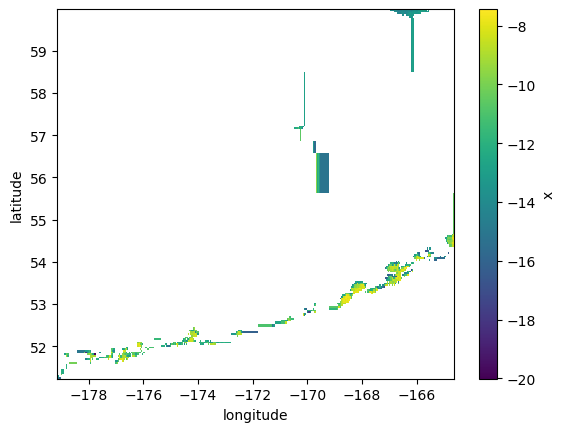

In [8]:
standoff_res['x'].plot()

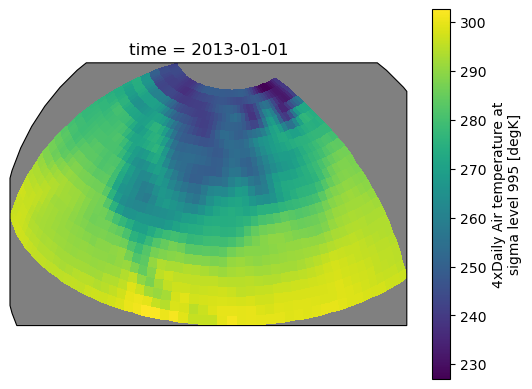

In [ ]:
import cartopy.crs as ccrs

air = xr.tutorial.open_dataset("air_temperature").air

p = air.isel(time=0).plot(
    subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),
    transform=ccrs.PlateCarree(),)